In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# -----------------------------
# 1. Data Preprocessing (Single Action Class)
# -----------------------------
base_dir = "/kaggle/input/ju-cricket/Cricket_Dataset_final/Task_B"  # base Task_B folder

action_class = "Fielding"  # Change to "Bowling" / "Fielding" / "Umpire"

transform = transforms.Compose([
    transforms.Resize((224, 224)),   
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# Point ImageFolder to *only* the action class folder
train_ds = datasets.ImageFolder(f"{base_dir}/train/{action_class}", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/{action_class}", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/{action_class}", transform=transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

print(f"Training only on: {action_class}")
print("Train classes:", train_ds.classes)
print("Train samples:", len(train_ds), 
      "Val samples:", len(val_ds), 
      "Test samples:", len(test_ds))

Training only on: Fielding
Train classes: ['boundary_save', 'catching_a_ball', 'diving_stop', 'run_out', 'stumping']
Train samples: 1917 Val samples: 504 Test samples: 630


In [2]:
print("Total training images:", len(train_ds))
print("Total validation images:", len(val_ds))
print("Total test images:", len(test_ds))

total_images = len(train_ds) + len(val_ds) + len(test_ds)
print("Total images in dataset:", total_images)


Total training images: 1917
Total validation images: 504
Total test images: 630
Total images in dataset: 3051


In [3]:
ignore_folder = "random_occlusion"

def count_images_ignore_folder(dataset, ignore_folder):
    count = 0
    for img_path, label in dataset.samples:
        # Skip if the image path contains the ignore_folder
        if ignore_folder not in img_path.split("/"):
            count += 1
    return count

train_count = count_images_ignore_folder(train_ds, ignore_folder)
val_count   = count_images_ignore_folder(val_ds, ignore_folder)
test_count  = count_images_ignore_folder(test_ds, ignore_folder)

total_count = train_count + val_count + test_count

print("Training images (excluding '{}'): {}".format(ignore_folder, train_count))
print("Validation images (excluding '{}'): {}".format(ignore_folder, val_count))
print("Test images (excluding '{}'): {}".format(ignore_folder, test_count))
print("Total images (excluding '{}'): {}".format(ignore_folder, total_count))


Training images (excluding 'random_occlusion'): 1704
Validation images (excluding 'random_occlusion'): 448
Test images (excluding 'random_occlusion'): 560
Total images (excluding 'random_occlusion'): 2712


In [4]:
ignore_folder = "random_occlusion"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)


Training folders considered: {'original', 'blur', 'gaussian_noise', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'lens_flare', 'low_resolution'}
Validation folders considered: {'original', 'blur', 'gaussian_noise', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'lens_flare', 'low_resolution'}
Test folders considered: {'original', 'blur', 'gaussian_noise', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'lens_flare', 'low_resolution'}


In [5]:
ignore_folder = "random_occlusion"

def filter_samples(dataset, ignore_folder):
    # Keep only samples where ignore_folder is NOT in the path
    filtered_samples = [s for s in dataset.samples if ignore_folder not in s[0].split("/")]
    dataset.samples = filtered_samples
    dataset.targets = [s[1] for s in filtered_samples]  # Update targets accordingly
    return dataset

# Create original datasets
train_ds = datasets.ImageFolder(f"{base_dir}/train/Fielding", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/Fielding", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/Fielding", transform=transform)

# Filter out 'random_occlusion' folder
train_ds = filter_samples(train_ds, ignore_folder)
val_ds   = filter_samples(val_ds, ignore_folder)
test_ds  = filter_samples(test_ds, ignore_folder)

# DataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# Classes (will remain the same)
classes = train_ds.classes
print("Classes:", classes)

# Show counts
print("Final Training images:", len(train_ds))
print("Final Validation images:", len(val_ds))
print("Final Test images:", len(test_ds))
print("Total images after filtering:", len(train_ds) + len(val_ds) + len(test_ds))


Classes: ['boundary_save', 'catching_a_ball', 'diving_stop', 'run_out', 'stumping']
Final Training images: 1704
Final Validation images: 448
Final Test images: 560
Total images after filtering: 2712


In [6]:
ignore_folder = "random_occlusion"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)


Training folders considered: {'original', 'blur', 'gaussian_noise', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'lens_flare', 'low_resolution'}
Validation folders considered: {'original', 'blur', 'gaussian_noise', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'lens_flare', 'low_resolution'}
Test folders considered: {'original', 'blur', 'gaussian_noise', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'lens_flare', 'low_resolution'}


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
import time
import os
import tempfile

# -----------------------------
# 1. Data Preprocessing with Filtering (InceptionV3 - 299x299)
# -----------------------------
data_dir = "/kaggle/input/ju-cricket/Cricket_Dataset_final/Task_B"

# InceptionV3 requires 299x299 input size
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # InceptionV3 specific size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

ignore_folder = "random_occlusion"

def filter_samples(dataset, ignore_folder):
    """Filter out samples containing the ignore_folder in their path"""
    filtered_samples = [s for s in dataset.samples if ignore_folder not in s[0].split("/")]
    dataset.samples = filtered_samples
    dataset.targets = [s[1] for s in filtered_samples]
    return dataset

# Create and filter datasets
print("🔄 Loading and filtering datasets for InceptionV3...")
train_ds = datasets.ImageFolder(f"{data_dir}/train/Fielding", transform=transform)
val_ds   = datasets.ImageFolder(f"{data_dir}/val/Fielding", transform=transform)
test_ds  = datasets.ImageFolder(f"{data_dir}/test/Fielding", transform=transform)

# Apply filtering
train_ds = filter_samples(train_ds, ignore_folder)
val_ds   = filter_samples(val_ds, ignore_folder)
test_ds  = filter_samples(test_ds, ignore_folder)

# Create DataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# Display information
classes = train_ds.classes
print(f"✅ Classes: {classes}")
print(f"📊 Dataset Statistics:")
print(f"│ Training images: {len(train_ds)}")
print(f"│ Validation images: {len(val_ds)}")
print(f"│ Test images: {len(test_ds)}")
print(f"│ Total images (after filtering): {len(train_ds) + len(val_ds) + len(test_ds)}")
print(f"│ Excluded folder: '{ignore_folder}'")
print(f"│ Number of classes: {len(classes)}")


🔄 Loading and filtering datasets for InceptionV3...
✅ Classes: ['boundary_save', 'catching_a_ball', 'diving_stop', 'run_out', 'stumping']
📊 Dataset Statistics:
│ Training images: 1704
│ Validation images: 448
│ Test images: 560
│ Total images (after filtering): 2712
│ Excluded folder: 'random_occlusion'
│ Number of classes: 5


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchsummary import summary
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from tqdm import tqdm
import time
from torchvision import models
import tempfile
import os


# -----------------------------
# 2. Pretrained InceptionV3 Model
# -----------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load pretrained InceptionV3
print("🔄 Loading pretrained InceptionV3 from ImageNet...")
model = models.inception_v3(pretrained=True)

# InceptionV3 has auxiliary classifier - disable it for fine-tuning
model.aux_logits = False

# Replace final classification layer
num_features = model.fc.in_features  # Get input features (2048)
model.fc = nn.Linear(num_features, len(classes))  # Replace final layer
model = model.to(device)

print(f"✅ Model loaded with {len(classes)} output classes")

# Calculate model parameters and size
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Calculate model file size
with tempfile.NamedTemporaryFile(delete=False, suffix='.pth') as tmp_file:
    torch.save(model.state_dict(), tmp_file.name)
    model_size_mb = os.path.getsize(tmp_file.name) / (1024 * 1024)
    os.unlink(tmp_file.name)

print(f"📊 Total parameters: {total_params:,}")
print(f"📊 Trainable parameters: {trainable_params:,}")
print(f"📊 Model file size: {model_size_mb:.2f} MB")
print(f"📋 Model Architecture:")
print(f"│ Input size: (3, 299, 299)")  # InceptionV3 specific
print(f"│ InceptionV3 features: 2048")
print(f"│ Output classes: {len(classes)}")
print(f"│ Auxiliary classifier: Disabled")


Using device: cuda
🔄 Loading pretrained InceptionV3 from ImageNet...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 209MB/s] 


✅ Model loaded with 5 output classes
📊 Total parameters: 25,122,509
📊 Trainable parameters: 25,122,509
📊 Model file size: 96.17 MB
📋 Model Architecture:
│ Input size: (3, 299, 299)
│ InceptionV3 features: 2048
│ Output classes: 5
│ Auxiliary classifier: Disabled



📋 Training Configuration:
│ Model: InceptionV3 (pretrained)
│ Optimizer: Adam (lr=0.0001)
│ Loss Function: CrossEntropyLoss
│ Batch Size: 32
│ Device: cuda
│ Data: Filtered (excluding 'random_occlusion')

🚀 Starting InceptionV3 Fine-tuning for 50 epochs...

📈 Epoch 1/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:56<00:00,  1.05s/it, Loss=0.7979, Acc=0.7365]


✅ Training completed in 56.80s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:08<00:00,  1.56it/s, Loss=0.7820, Acc=0.7232]


✅ Validation completed in 8.96s
🌟 New best model found! Validation Loss: 0.7820

📊 Epoch 1 Summary:
│ Train Loss: 0.7979 | Train Acc: 0.7365
│ Val Loss:   0.7820 | Val Acc:   0.7232
│ Train Time: 56.80s | Val Time: 8.96s
│ Total Epoch Time: 65.77s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 2/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:39<00:00,  1.37it/s, Loss=0.0809, Acc=0.9883]


✅ Training completed in 39.28s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.56it/s, Loss=0.8364, Acc=0.7188]


✅ Validation completed in 5.47s

📊 Epoch 2 Summary:
│ Train Loss: 0.0809 | Train Acc: 0.9883
│ Val Loss:   0.8364 | Val Acc:   0.7188
│ Train Time: 39.28s | Val Time: 5.47s
│ Total Epoch Time: 44.75s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 3/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.24it/s, Loss=0.0230, Acc=0.9982]


✅ Training completed in 43.47s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:06<00:00,  2.29it/s, Loss=0.8947, Acc=0.6920]


✅ Validation completed in 6.13s

📊 Epoch 3 Summary:
│ Train Loss: 0.0230 | Train Acc: 0.9982
│ Val Loss:   0.8947 | Val Acc:   0.6920
│ Train Time: 43.47s | Val Time: 6.13s
│ Total Epoch Time: 49.60s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 4/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.33it/s, Loss=0.0225, Acc=0.9959]


✅ Training completed in 40.67s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.65it/s, Loss=0.9285, Acc=0.7121]


✅ Validation completed in 5.28s

📊 Epoch 4 Summary:
│ Train Loss: 0.0225 | Train Acc: 0.9959
│ Val Loss:   0.9285 | Val Acc:   0.7121
│ Train Time: 40.67s | Val Time: 5.28s
│ Total Epoch Time: 45.96s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 5/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.31it/s, Loss=0.0444, Acc=0.9888]


✅ Training completed in 41.08s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.63it/s, Loss=0.8828, Acc=0.7299]


✅ Validation completed in 5.34s

📊 Epoch 5 Summary:
│ Train Loss: 0.0444 | Train Acc: 0.9888
│ Val Loss:   0.8828 | Val Acc:   0.7299
│ Train Time: 41.08s | Val Time: 5.34s
│ Total Epoch Time: 46.42s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 6/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:39<00:00,  1.36it/s, Loss=0.0267, Acc=0.9947]


✅ Training completed in 39.75s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.69it/s, Loss=0.9864, Acc=0.7210]


✅ Validation completed in 5.20s

📊 Epoch 6 Summary:
│ Train Loss: 0.0267 | Train Acc: 0.9947
│ Val Loss:   0.9864 | Val Acc:   0.7210
│ Train Time: 39.75s | Val Time: 5.20s
│ Total Epoch Time: 44.96s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 7/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:39<00:00,  1.36it/s, Loss=0.0461, Acc=0.9894]


✅ Training completed in 39.84s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.63it/s, Loss=0.9991, Acc=0.6920]


✅ Validation completed in 5.32s

📊 Epoch 7 Summary:
│ Train Loss: 0.0461 | Train Acc: 0.9894
│ Val Loss:   0.9991 | Val Acc:   0.6920
│ Train Time: 39.84s | Val Time: 5.32s
│ Total Epoch Time: 45.16s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 8/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:39<00:00,  1.37it/s, Loss=0.0269, Acc=0.9912]


✅ Training completed in 39.52s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.60it/s, Loss=0.8630, Acc=0.7076]


✅ Validation completed in 5.38s

📊 Epoch 8 Summary:
│ Train Loss: 0.0269 | Train Acc: 0.9912
│ Val Loss:   0.8630 | Val Acc:   0.7076
│ Train Time: 39.52s | Val Time: 5.38s
│ Total Epoch Time: 44.90s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 9/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:39<00:00,  1.36it/s, Loss=0.0127, Acc=0.9982]


✅ Training completed in 39.72s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.61it/s, Loss=0.9471, Acc=0.7076]


✅ Validation completed in 5.37s

📊 Epoch 9 Summary:
│ Train Loss: 0.0127 | Train Acc: 0.9982
│ Val Loss:   0.9471 | Val Acc:   0.7076
│ Train Time: 39.72s | Val Time: 5.37s
│ Total Epoch Time: 45.10s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 10/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.33it/s, Loss=0.0051, Acc=0.9994]


✅ Training completed in 40.51s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.63it/s, Loss=0.8917, Acc=0.7076]


✅ Validation completed in 5.33s

📊 Epoch 10 Summary:
│ Train Loss: 0.0051 | Train Acc: 0.9994
│ Val Loss:   0.8917 | Val Acc:   0.7076
│ Train Time: 40.51s | Val Time: 5.33s
│ Total Epoch Time: 45.84s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 11/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.26it/s, Loss=0.0050, Acc=1.0000]


✅ Training completed in 43.01s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:06<00:00,  2.07it/s, Loss=1.0088, Acc=0.6875]


✅ Validation completed in 6.77s

📊 Epoch 11 Summary:
│ Train Loss: 0.0050 | Train Acc: 1.0000
│ Val Loss:   1.0088 | Val Acc:   0.6875
│ Train Time: 43.01s | Val Time: 6.77s
│ Total Epoch Time: 49.79s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 12/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:48<00:00,  1.12it/s, Loss=0.0054, Acc=0.9994]


✅ Training completed in 48.28s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:06<00:00,  2.16it/s, Loss=0.9089, Acc=0.7165]


✅ Validation completed in 6.48s

📊 Epoch 12 Summary:
│ Train Loss: 0.0054 | Train Acc: 0.9994
│ Val Loss:   0.9089 | Val Acc:   0.7165
│ Train Time: 48.28s | Val Time: 6.48s
│ Total Epoch Time: 54.76s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 13/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:44<00:00,  1.21it/s, Loss=0.0093, Acc=0.9982]


✅ Training completed in 44.57s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:06<00:00,  2.07it/s, Loss=0.9128, Acc=0.7009]


✅ Validation completed in 6.77s

📊 Epoch 13 Summary:
│ Train Loss: 0.0093 | Train Acc: 0.9982
│ Val Loss:   0.9128 | Val Acc:   0.7009
│ Train Time: 44.57s | Val Time: 6.77s
│ Total Epoch Time: 51.34s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 14/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:45<00:00,  1.18it/s, Loss=0.0091, Acc=0.9988]


✅ Training completed in 45.59s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:06<00:00,  2.29it/s, Loss=1.0398, Acc=0.6763]


✅ Validation completed in 6.13s

📊 Epoch 14 Summary:
│ Train Loss: 0.0091 | Train Acc: 0.9988
│ Val Loss:   1.0398 | Val Acc:   0.6763
│ Train Time: 45.59s | Val Time: 6.13s
│ Total Epoch Time: 51.72s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 15/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.27it/s, Loss=0.0029, Acc=1.0000]


✅ Training completed in 42.36s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.53it/s, Loss=0.9742, Acc=0.6920]


✅ Validation completed in 5.55s

📊 Epoch 15 Summary:
│ Train Loss: 0.0029 | Train Acc: 1.0000
│ Val Loss:   0.9742 | Val Acc:   0.6920
│ Train Time: 42.36s | Val Time: 5.55s
│ Total Epoch Time: 47.91s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 16/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.33it/s, Loss=0.0017, Acc=1.0000]


✅ Training completed in 40.51s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.60it/s, Loss=0.9351, Acc=0.7031]


✅ Validation completed in 5.40s

📊 Epoch 16 Summary:
│ Train Loss: 0.0017 | Train Acc: 1.0000
│ Val Loss:   0.9351 | Val Acc:   0.7031
│ Train Time: 40.51s | Val Time: 5.40s
│ Total Epoch Time: 45.91s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 17/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.33it/s, Loss=0.0036, Acc=0.9994]


✅ Training completed in 40.58s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.60it/s, Loss=0.9420, Acc=0.7098]


✅ Validation completed in 5.40s

📊 Epoch 17 Summary:
│ Train Loss: 0.0036 | Train Acc: 0.9994
│ Val Loss:   0.9420 | Val Acc:   0.7098
│ Train Time: 40.58s | Val Time: 5.40s
│ Total Epoch Time: 45.98s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 18/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.33it/s, Loss=0.0083, Acc=0.9982]


✅ Training completed in 40.58s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.37it/s, Loss=1.1063, Acc=0.6875]


✅ Validation completed in 5.92s

📊 Epoch 18 Summary:
│ Train Loss: 0.0083 | Train Acc: 0.9982
│ Val Loss:   1.1063 | Val Acc:   0.6875
│ Train Time: 40.58s | Val Time: 5.92s
│ Total Epoch Time: 46.50s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 19/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.30it/s, Loss=0.0086, Acc=0.9965]


✅ Training completed in 41.69s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.63it/s, Loss=1.2042, Acc=0.6451]


✅ Validation completed in 5.33s

📊 Epoch 19 Summary:
│ Train Loss: 0.0086 | Train Acc: 0.9965
│ Val Loss:   1.2042 | Val Acc:   0.6451
│ Train Time: 41.69s | Val Time: 5.33s
│ Total Epoch Time: 47.03s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 20/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.33it/s, Loss=0.0077, Acc=0.9994]


✅ Training completed in 40.62s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.58it/s, Loss=0.9281, Acc=0.7210]


✅ Validation completed in 5.44s

📊 Epoch 20 Summary:
│ Train Loss: 0.0077 | Train Acc: 0.9994
│ Val Loss:   0.9281 | Val Acc:   0.7210
│ Train Time: 40.62s | Val Time: 5.44s
│ Total Epoch Time: 46.07s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 21/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.30it/s, Loss=0.0048, Acc=0.9988]


✅ Training completed in 41.41s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.53it/s, Loss=1.1452, Acc=0.6987]


✅ Validation completed in 5.54s

📊 Epoch 21 Summary:
│ Train Loss: 0.0048 | Train Acc: 0.9988
│ Val Loss:   1.1452 | Val Acc:   0.6987
│ Train Time: 41.41s | Val Time: 5.54s
│ Total Epoch Time: 46.96s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 22/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.30it/s, Loss=0.0072, Acc=0.9988]


✅ Training completed in 41.69s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.50it/s, Loss=0.9525, Acc=0.7121]


✅ Validation completed in 5.62s

📊 Epoch 22 Summary:
│ Train Loss: 0.0072 | Train Acc: 0.9988
│ Val Loss:   0.9525 | Val Acc:   0.7121
│ Train Time: 41.69s | Val Time: 5.62s
│ Total Epoch Time: 47.31s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 23/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:44<00:00,  1.22it/s, Loss=0.0253, Acc=0.9959]


✅ Training completed in 44.32s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.49it/s, Loss=1.2656, Acc=0.7031]


✅ Validation completed in 5.64s

📊 Epoch 23 Summary:
│ Train Loss: 0.0253 | Train Acc: 0.9959
│ Val Loss:   1.2656 | Val Acc:   0.7031
│ Train Time: 44.32s | Val Time: 5.64s
│ Total Epoch Time: 49.97s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 24/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:44<00:00,  1.22it/s, Loss=0.0675, Acc=0.9877]


✅ Training completed in 44.27s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:06<00:00,  2.03it/s, Loss=1.0655, Acc=0.7031]


✅ Validation completed in 6.89s

📊 Epoch 24 Summary:
│ Train Loss: 0.0675 | Train Acc: 0.9877
│ Val Loss:   1.0655 | Val Acc:   0.7031
│ Train Time: 44.27s | Val Time: 6.89s
│ Total Epoch Time: 51.17s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 25/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:44<00:00,  1.20it/s, Loss=0.0411, Acc=0.9900]


✅ Training completed in 44.91s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:07<00:00,  1.98it/s, Loss=1.1201, Acc=0.6920]


✅ Validation completed in 7.09s

📊 Epoch 25 Summary:
│ Train Loss: 0.0411 | Train Acc: 0.9900
│ Val Loss:   1.1201 | Val Acc:   0.6920
│ Train Time: 44.91s | Val Time: 7.09s
│ Total Epoch Time: 52.01s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 26/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.27it/s, Loss=0.0224, Acc=0.9941]


✅ Training completed in 42.44s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.53it/s, Loss=0.9352, Acc=0.7121]


✅ Validation completed in 5.53s

📊 Epoch 26 Summary:
│ Train Loss: 0.0224 | Train Acc: 0.9941
│ Val Loss:   0.9352 | Val Acc:   0.7121
│ Train Time: 42.44s | Val Time: 5.53s
│ Total Epoch Time: 47.97s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 27/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.30it/s, Loss=0.0080, Acc=0.9982]


✅ Training completed in 41.51s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.45it/s, Loss=1.1436, Acc=0.6897]


✅ Validation completed in 5.72s

📊 Epoch 27 Summary:
│ Train Loss: 0.0080 | Train Acc: 0.9982
│ Val Loss:   1.1436 | Val Acc:   0.6897
│ Train Time: 41.51s | Val Time: 5.72s
│ Total Epoch Time: 47.24s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 28/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.32it/s, Loss=0.0066, Acc=0.9982]


✅ Training completed in 40.82s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.51it/s, Loss=1.0599, Acc=0.6741]


✅ Validation completed in 5.59s

📊 Epoch 28 Summary:
│ Train Loss: 0.0066 | Train Acc: 0.9982
│ Val Loss:   1.0599 | Val Acc:   0.6741
│ Train Time: 40.82s | Val Time: 5.59s
│ Total Epoch Time: 46.42s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 29/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.32it/s, Loss=0.0072, Acc=0.9982]


✅ Training completed in 40.92s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.37it/s, Loss=1.2219, Acc=0.6674]


✅ Validation completed in 5.91s

📊 Epoch 29 Summary:
│ Train Loss: 0.0072 | Train Acc: 0.9982
│ Val Loss:   1.2219 | Val Acc:   0.6674
│ Train Time: 40.92s | Val Time: 5.91s
│ Total Epoch Time: 46.83s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 30/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.27it/s, Loss=0.0039, Acc=1.0000]


✅ Training completed in 42.37s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.34it/s, Loss=1.1190, Acc=0.7009]


✅ Validation completed in 5.99s

📊 Epoch 30 Summary:
│ Train Loss: 0.0039 | Train Acc: 1.0000
│ Val Loss:   1.1190 | Val Acc:   0.7009
│ Train Time: 42.37s | Val Time: 5.99s
│ Total Epoch Time: 48.37s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 31/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.35it/s, Loss=0.0045, Acc=0.9994]


✅ Training completed in 40.06s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.66it/s, Loss=1.3395, Acc=0.6853]


✅ Validation completed in 5.27s

📊 Epoch 31 Summary:
│ Train Loss: 0.0045 | Train Acc: 0.9994
│ Val Loss:   1.3395 | Val Acc:   0.6853
│ Train Time: 40.06s | Val Time: 5.27s
│ Total Epoch Time: 45.33s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 32/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.35it/s, Loss=0.0030, Acc=0.9994]


✅ Training completed in 40.01s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.65it/s, Loss=1.2271, Acc=0.6652]


✅ Validation completed in 5.29s

📊 Epoch 32 Summary:
│ Train Loss: 0.0030 | Train Acc: 0.9994
│ Val Loss:   1.2271 | Val Acc:   0.6652
│ Train Time: 40.01s | Val Time: 5.29s
│ Total Epoch Time: 45.30s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 33/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.35it/s, Loss=0.0050, Acc=0.9994]


✅ Training completed in 40.06s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.52it/s, Loss=1.1943, Acc=0.6585]


✅ Validation completed in 5.56s

📊 Epoch 33 Summary:
│ Train Loss: 0.0050 | Train Acc: 0.9994
│ Val Loss:   1.1943 | Val Acc:   0.6585
│ Train Time: 40.06s | Val Time: 5.56s
│ Total Epoch Time: 45.62s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 34/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.35it/s, Loss=0.0020, Acc=0.9994]


✅ Training completed in 40.04s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.64it/s, Loss=1.1324, Acc=0.6987]


✅ Validation completed in 5.32s

📊 Epoch 34 Summary:
│ Train Loss: 0.0020 | Train Acc: 0.9994
│ Val Loss:   1.1324 | Val Acc:   0.6987
│ Train Time: 40.04s | Val Time: 5.32s
│ Total Epoch Time: 45.36s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 35/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.33it/s, Loss=0.0008, Acc=1.0000]


✅ Training completed in 40.60s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.54it/s, Loss=1.1500, Acc=0.7031]


✅ Validation completed in 5.51s

📊 Epoch 35 Summary:
│ Train Loss: 0.0008 | Train Acc: 1.0000
│ Val Loss:   1.1500 | Val Acc:   0.7031
│ Train Time: 40.60s | Val Time: 5.51s
│ Total Epoch Time: 46.11s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 36/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.33it/s, Loss=0.0016, Acc=0.9994]


✅ Training completed in 40.53s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.62it/s, Loss=1.1780, Acc=0.7009]


✅ Validation completed in 5.35s

📊 Epoch 36 Summary:
│ Train Loss: 0.0016 | Train Acc: 0.9994
│ Val Loss:   1.1780 | Val Acc:   0.7009
│ Train Time: 40.53s | Val Time: 5.35s
│ Total Epoch Time: 45.89s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 37/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.34it/s, Loss=0.0010, Acc=1.0000]


✅ Training completed in 40.23s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.63it/s, Loss=1.1458, Acc=0.7143]


✅ Validation completed in 5.32s

📊 Epoch 37 Summary:
│ Train Loss: 0.0010 | Train Acc: 1.0000
│ Val Loss:   1.1458 | Val Acc:   0.7143
│ Train Time: 40.23s | Val Time: 5.32s
│ Total Epoch Time: 45.56s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 38/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.34it/s, Loss=0.0069, Acc=0.9977]


✅ Training completed in 40.43s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.55it/s, Loss=1.1755, Acc=0.6875]


✅ Validation completed in 5.49s

📊 Epoch 38 Summary:
│ Train Loss: 0.0069 | Train Acc: 0.9977
│ Val Loss:   1.1755 | Val Acc:   0.6875
│ Train Time: 40.43s | Val Time: 5.49s
│ Total Epoch Time: 45.92s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 39/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.32it/s, Loss=0.0122, Acc=0.9982]


✅ Training completed in 40.77s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.56it/s, Loss=1.2133, Acc=0.6496]


✅ Validation completed in 5.48s

📊 Epoch 39 Summary:
│ Train Loss: 0.0122 | Train Acc: 0.9982
│ Val Loss:   1.2133 | Val Acc:   0.6496
│ Train Time: 40.77s | Val Time: 5.48s
│ Total Epoch Time: 46.26s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 40/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.31it/s, Loss=0.0147, Acc=0.9953]


✅ Training completed in 41.19s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.40it/s, Loss=1.2455, Acc=0.7098]


✅ Validation completed in 5.83s

📊 Epoch 40 Summary:
│ Train Loss: 0.0147 | Train Acc: 0.9953
│ Val Loss:   1.2455 | Val Acc:   0.7098
│ Train Time: 41.19s | Val Time: 5.83s
│ Total Epoch Time: 47.02s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 41/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.31it/s, Loss=0.0049, Acc=0.9988]


✅ Training completed in 41.09s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.55it/s, Loss=1.5043, Acc=0.6406]


✅ Validation completed in 5.50s

📊 Epoch 41 Summary:
│ Train Loss: 0.0049 | Train Acc: 0.9988
│ Val Loss:   1.5043 | Val Acc:   0.6406
│ Train Time: 41.09s | Val Time: 5.50s
│ Total Epoch Time: 46.59s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 42/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.29it/s, Loss=0.0038, Acc=0.9982]


✅ Training completed in 41.99s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:06<00:00,  2.13it/s, Loss=1.3185, Acc=0.6830]


✅ Validation completed in 6.57s

📊 Epoch 42 Summary:
│ Train Loss: 0.0038 | Train Acc: 0.9982
│ Val Loss:   1.3185 | Val Acc:   0.6830
│ Train Time: 41.99s | Val Time: 6.57s
│ Total Epoch Time: 48.57s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 43/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:44<00:00,  1.21it/s, Loss=0.0009, Acc=1.0000]


✅ Training completed in 44.67s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:06<00:00,  2.03it/s, Loss=1.2963, Acc=0.7121]


✅ Validation completed in 6.91s

📊 Epoch 43 Summary:
│ Train Loss: 0.0009 | Train Acc: 1.0000
│ Val Loss:   1.2963 | Val Acc:   0.7121
│ Train Time: 44.67s | Val Time: 6.91s
│ Total Epoch Time: 51.58s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 44/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:44<00:00,  1.21it/s, Loss=0.0113, Acc=0.9994]


✅ Training completed in 44.59s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.40it/s, Loss=1.2242, Acc=0.7009]


✅ Validation completed in 5.85s

📊 Epoch 44 Summary:
│ Train Loss: 0.0113 | Train Acc: 0.9994
│ Val Loss:   1.2242 | Val Acc:   0.7009
│ Train Time: 44.59s | Val Time: 5.85s
│ Total Epoch Time: 50.44s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 45/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.24it/s, Loss=0.0426, Acc=0.9912]


✅ Training completed in 43.50s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.36it/s, Loss=1.6069, Acc=0.6496]


✅ Validation completed in 5.94s

📊 Epoch 45 Summary:
│ Train Loss: 0.0426 | Train Acc: 0.9912
│ Val Loss:   1.6069 | Val Acc:   0.6496
│ Train Time: 43.50s | Val Time: 5.94s
│ Total Epoch Time: 49.44s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 46/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.33it/s, Loss=0.0413, Acc=0.9900]


✅ Training completed in 40.57s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.62it/s, Loss=1.0736, Acc=0.6562]


✅ Validation completed in 5.35s

📊 Epoch 46 Summary:
│ Train Loss: 0.0413 | Train Acc: 0.9900
│ Val Loss:   1.0736 | Val Acc:   0.6562
│ Train Time: 40.57s | Val Time: 5.35s
│ Total Epoch Time: 45.92s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 47/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.35it/s, Loss=0.0160, Acc=0.9935]


✅ Training completed in 40.07s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.64it/s, Loss=1.1425, Acc=0.7098]


✅ Validation completed in 5.32s

📊 Epoch 47 Summary:
│ Train Loss: 0.0160 | Train Acc: 0.9935
│ Val Loss:   1.1425 | Val Acc:   0.7098
│ Train Time: 40.07s | Val Time: 5.32s
│ Total Epoch Time: 45.39s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 48/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.35it/s, Loss=0.0126, Acc=0.9941]


✅ Training completed in 40.14s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.68it/s, Loss=1.3462, Acc=0.6942]


✅ Validation completed in 5.24s

📊 Epoch 48 Summary:
│ Train Loss: 0.0126 | Train Acc: 0.9941
│ Val Loss:   1.3462 | Val Acc:   0.6942
│ Train Time: 40.14s | Val Time: 5.24s
│ Total Epoch Time: 45.38s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 49/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.34it/s, Loss=0.0069, Acc=0.9994]


✅ Training completed in 40.18s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.66it/s, Loss=1.6335, Acc=0.7210]


✅ Validation completed in 5.26s

📊 Epoch 49 Summary:
│ Train Loss: 0.0069 | Train Acc: 0.9994
│ Val Loss:   1.6335 | Val Acc:   0.7210
│ Train Time: 40.18s | Val Time: 5.26s
│ Total Epoch Time: 45.45s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

📈 Epoch 50/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:40<00:00,  1.35it/s, Loss=0.0029, Acc=0.9994]


✅ Training completed in 40.05s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.62it/s, Loss=1.3786, Acc=0.7188]


✅ Validation completed in 5.35s

📊 Epoch 50 Summary:
│ Train Loss: 0.0029 | Train Acc: 0.9994
│ Val Loss:   1.3786 | Val Acc:   0.7188
│ Train Time: 40.05s | Val Time: 5.35s
│ Total Epoch Time: 45.40s
│ Best Val Loss: 0.7820 (Epoch 1)
│ GPU Memory: 0.4GB / 4.0GB

💾 Best model saved as 'best_cricket_inceptionv3_filtered.pth'
📊 Best model stats:
│ Best Epoch: 1
│ Best Val Loss: 0.7820
│ Best Val Acc: 0.7232

💾 Training history saved to 'cricket_inceptionv3_filtered_history_pretrained.csv'

🎉 InceptionV3 Fine-tuning Complete!
Total Training Time: 2382.28s (39.7 minutes)
Average Epoch Time: 47.65s

🧪 Loading Best Model for Testing...
✅ Best model from epoch 1 loaded successfully!


Testing: 100%|██████████████████████████████| 18/18 [00:12<00:00,  1.49it/s]


✅ Testing completed in 12.06s

📋 Classification Report:
                 precision    recall  f1-score   support

  boundary_save       0.69      0.79      0.74       152
catching_a_ball       0.47      0.46      0.47       104
    diving_stop       0.26      0.16      0.20        56
        run_out       0.66      0.71      0.68       128
       stumping       0.67      0.62      0.65       120

       accuracy                           0.61       560
      macro avg       0.55      0.55      0.55       560
   weighted avg       0.60      0.61      0.60       560

🎯 Test Accuracy: 0.6125

📊 Cricket Classification Performance (InceptionV3 - Filtered Data):
│ Best Validation Loss: 0.7820 (Epoch 1)
│ Best Validation Acc:  0.7232 (Epoch 1)
│ Final Test Accuracy:  0.6125
│ Val-Test Gap:         0.1107
│ Data Filtering: Excluded 'random_occlusion' folder

💾 Files saved:
│ best_cricket_inceptionv3_filtered.pth - Best model weights
│ cricket_inceptionv3_filtered_history.csv - Training metrics

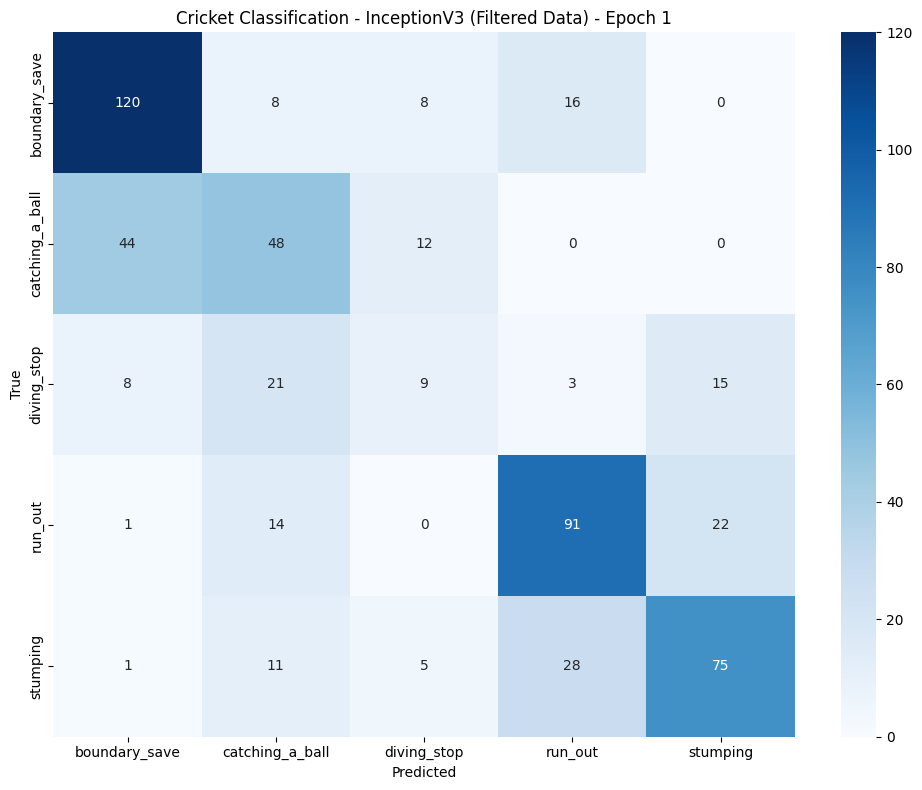

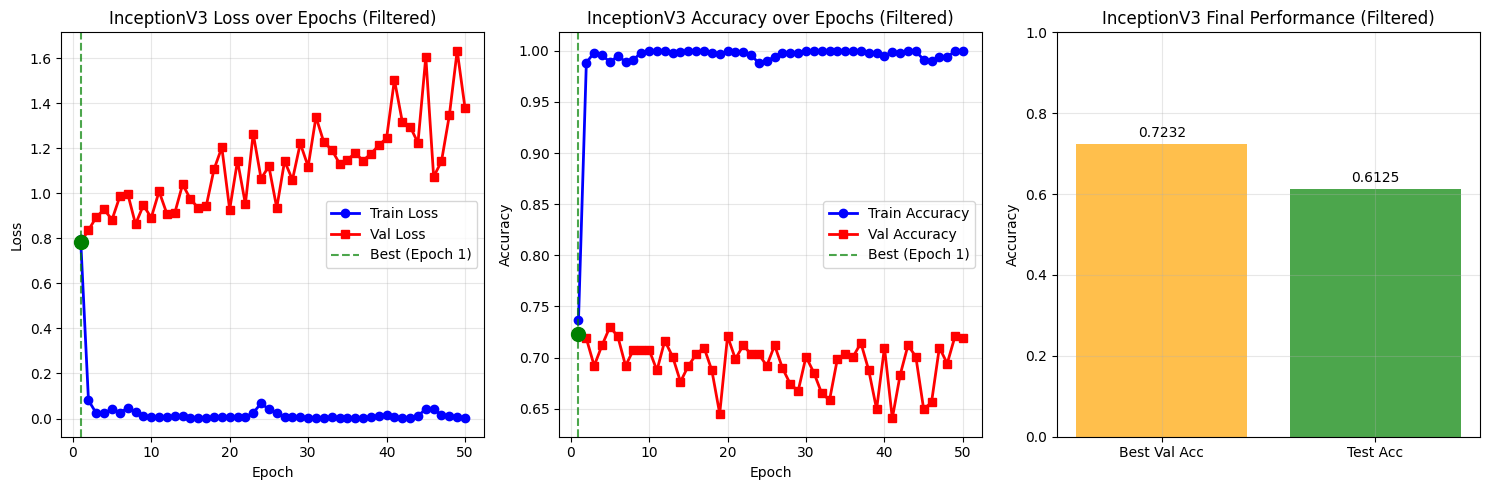


⏰ Final Timing Summary:
│ Total Training: 2382.28s (39.7 min)
│ Average per Epoch: 47.65s
│ Testing Time: 12.06s
│ Total Runtime: 2394.34s

🏗️ InceptionV3 + Filtered Data Benefits:
│ Clean dataset: 'random_occlusion' folder excluded
│ Multi-scale features: Inception modules with multiple filter sizes
│ High resolution: 299x299 input captures more detail
│ ImageNet pretrained: Leverages powerful feature representations
│ Optimized for quality: Should achieve excellent cricket classification


In [9]:

# -----------------------------
# 3. Training Setup
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Lower LR for fine-tuning

print(f"\n📋 Training Configuration:")
print(f"│ Model: InceptionV3 (pretrained)")
print(f"│ Optimizer: Adam (lr={optimizer.param_groups[0]['lr']})")
print(f"│ Loss Function: CrossEntropyLoss")
print(f"│ Batch Size: 32")
print(f"│ Device: {device}")
print(f"│ Data: Filtered (excluding '{ignore_folder}')")

# -----------------------------
# 4. Training Loop with Model Saving
# -----------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []
epoch_times = []
epochs = 50

# Initialize best model tracking (using val_loss for fine-tuning)
best_val_loss = float('inf')
best_model_state = None
best_epoch = 0
best_val_acc = 0.0

print(f"\n🚀 Starting InceptionV3 Fine-tuning for {epochs} epochs...")
print("=" * 80)
total_start_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()
    
    print(f"\n📈 Epoch {epoch+1}/{epochs}")
    print("-" * 50)
    
    # Training Phase
    print("🔄 Training Phase...")
    model.train()
    running_loss, correct, total = 0, 0, 0
    
    train_pbar = tqdm(train_loader, desc="Training", 
                     bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    train_phase_start = time.time()
    
    for batch_idx, (imgs, labels) in enumerate(train_pbar):
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        
        current_acc = correct / total
        train_pbar.set_postfix({
            'Loss': f'{running_loss/(batch_idx+1):.4f}',
            'Acc': f'{current_acc:.4f}'
        })
        
        if device.type == 'cuda' and batch_idx % 10 == 0:
            gpu_memory = torch.cuda.memory_allocated() / 1024**3
            train_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}',
                'GPU': f'{gpu_memory:.1f}GB'
            })
    
    train_phase_time = time.time() - train_phase_start
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    print(f"✅ Training completed in {train_phase_time:.2f}s")
    
    # Validation Phase
    print("🔍 Validation Phase...")
    model.eval()
    running_loss, correct, total = 0, 0, 0
    
    val_phase_start = time.time()
    val_pbar = tqdm(val_loader, desc="Validation", 
                   bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    with torch.no_grad():
        for batch_idx, (imgs, labels) in enumerate(val_pbar):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
            current_acc = correct / total
            val_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}'
            })
    
    val_phase_time = time.time() - val_phase_start
    val_loss = running_loss / len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"✅ Validation completed in {val_phase_time:.2f}s")
    
    # Check if this is the best model (using val_loss for fine-tuning)
    is_best = val_loss < best_val_loss
    if is_best:
        best_val_loss = val_loss
        best_val_acc = val_acc
        best_epoch = epoch + 1
        best_model_state = model.state_dict().copy()
        print(f"🌟 New best model found! Validation Loss: {val_loss:.4f}")
    
    # Epoch Summary
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    
    print(f"\n📊 Epoch {epoch+1} Summary:")
    print(f"│ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"│ Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.4f}")
    print(f"│ Train Time: {train_phase_time:.2f}s | Val Time: {val_phase_time:.2f}s")
    print(f"│ Total Epoch Time: {epoch_time:.2f}s")
    print(f"│ Best Val Loss: {best_val_loss:.4f} (Epoch {best_epoch})")
    
    if device.type == 'cuda':
        print(f"│ GPU Memory: {torch.cuda.memory_allocated()/1024**3:.1f}GB / {torch.cuda.memory_reserved()/1024**3:.1f}GB")
    
    print("=" * 80)

total_training_time = time.time() - total_start_time

# Save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'best_cricket_inceptionv3_filtered_pretrained.pth')
    print(f"\n💾 Best model saved as 'best_cricket_inceptionv3_filtered.pth'")
    print(f"📊 Best model stats:")
    print(f"│ Best Epoch: {best_epoch}")
    print(f"│ Best Val Loss: {best_val_loss:.4f}")
    print(f"│ Best Val Acc: {best_val_acc:.4f}")

# Save training history
history_data = {
    'epoch': list(range(1, epochs+1)),
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_acc': train_accs,
    'val_acc': val_accs,
    'epoch_time': epoch_times
}

history_df = pd.DataFrame(history_data)
history_df.to_csv('cricket_inceptionv3_filtered_history_pretrained.csv', index=False)
print("\n💾 Training history saved to 'cricket_inceptionv3_filtered_history_pretrained.csv'")

print(f"\n🎉 InceptionV3 Fine-tuning Complete!")
print(f"Total Training Time: {total_training_time:.2f}s ({total_training_time/60:.1f} minutes)")
print(f"Average Epoch Time: {np.mean(epoch_times):.2f}s")

# -----------------------------
# 5. Load Best Model and Test
# -----------------------------
print(f"\n🧪 Loading Best Model for Testing...")
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"✅ Best model from epoch {best_epoch} loaded successfully!")

test_start_time = time.time()
y_true, y_pred = [], []
model.eval()
test_pbar = tqdm(test_loader, desc="Testing", 
                bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')

with torch.no_grad():
    for imgs, labels in test_pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

test_time = time.time() - test_start_time
test_accuracy = accuracy_score(y_true, y_pred)

print(f"✅ Testing completed in {test_time:.2f}s")
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))
print(f"🎯 Test Accuracy: {test_accuracy:.4f}")

# Performance Summary
print(f"\n📊 Cricket Classification Performance (InceptionV3 - Filtered Data):")
print(f"│ Best Validation Loss: {best_val_loss:.4f} (Epoch {best_epoch})")
print(f"│ Best Validation Acc:  {best_val_acc:.4f} (Epoch {best_epoch})")
print(f"│ Final Test Accuracy:  {test_accuracy:.4f}")
print(f"│ Val-Test Gap:         {abs(best_val_acc - test_accuracy):.4f}")
print(f"│ Data Filtering: Excluded '{ignore_folder}' folder")

print(f"\n💾 Files saved:")
print(f"│ best_cricket_inceptionv3_filtered.pth - Best model weights")
print(f"│ cricket_inceptionv3_filtered_history.csv - Training metrics")

# -----------------------------
# 6. Visualizations
# -----------------------------
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Cricket Classification - InceptionV3 (Filtered Data) - Epoch {best_epoch}")
plt.tight_layout()
plt.show()

# Training Curves
plt.figure(figsize=(15, 5))

# Loss Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, epochs+1), train_losses, 'b-', label="Train Loss", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_losses, 'r-', label="Val Loss", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.scatter([best_epoch], [best_val_loss], color='green', s=100, zorder=5)
plt.legend()
plt.title("InceptionV3 Loss over Epochs (Filtered)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)

# Accuracy Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, epochs+1), train_accs, 'b-', label="Train Accuracy", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_accs, 'r-', label="Val Accuracy", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.scatter([best_epoch], [best_val_acc], color='green', s=100, zorder=5)
plt.legend()
plt.title("InceptionV3 Accuracy over Epochs (Filtered)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True, alpha=0.3)

# Final Performance
plt.subplot(1, 3, 3)
metrics = ['Best Val Acc', 'Test Acc']
values = [best_val_acc, test_accuracy]
colors = ['orange', 'green']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title("InceptionV3 Final Performance (Filtered)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, 
             f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Final Summary
print(f"\n⏰ Final Timing Summary:")
print(f"│ Total Training: {total_training_time:.2f}s ({total_training_time/60:.1f} min)")
print(f"│ Average per Epoch: {np.mean(epoch_times):.2f}s")
print(f"│ Testing Time: {test_time:.2f}s")
print(f"│ Total Runtime: {total_training_time + test_time:.2f}s")

# Model and Data Info
print(f"\n🏗️ InceptionV3 + Filtered Data Benefits:")
print(f"│ Clean dataset: '{ignore_folder}' folder excluded")
print(f"│ Multi-scale features: Inception modules with multiple filter sizes")
print(f"│ High resolution: 299x299 input captures more detail")
print(f"│ ImageNet pretrained: Leverages powerful feature representations")
print(f"│ Optimized for quality: Should achieve excellent cricket classification")